<a href="https://colab.research.google.com/github/DianaMutekhele/Scientific-data-Analysis/blob/main/Copy_of_scientific_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction

#  One-way ANOVA(Analysis of Variance)

The one-way ANOVA is a test that is often used to determine if there are differences in means between different categories.

I'll use this test, if  I have a nominal and a scale (interval/ratio) variable.

There a few different ways you can do this test with Python.   

- 1.Pingouin package or 

- 2.the statsmodels.api. 


# 1.Pingouin

In [ ]:
!pip install pingouin

     |████████████████████████████████| 206 kB 5.4 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
     |████████████████████████████████| 9.5 MB 43.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=2184aedf94f775d46ddce3eff375ab8edb33b94ccd69287516124da8a1111ec9
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=fe95a6399190798bfab0cd285bdb4e422e21fa83a3a17d06c0f5349c4a03dace
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
import pandas as pd
import pingouin as pg

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Anova_data/airline_altitude.csv")

In [ ]:
df.head()

,Average Flight Altitude,Airline,Altitude
0,January,Qatar,34000
1,February,Qatar,35000
2,March,Qatar,33500
3,April,Qatar,40000
4,May,Qatar,32000


In [ ]:
df.rename({"Average Flight Altitude":"Months"},inplace=True,axis=1)

In [ ]:
df.head()

,Months,Airline,Altitude
0,January,Qatar,34000
1,February,Qatar,35000
2,March,Qatar,33500
3,April,Qatar,40000
4,May,Qatar,32000


In [ ]:
df['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Months    35 non-null     object
 1   Airline   35 non-null     object
 2   Altitude  35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [ ]:
df.Airline.unique()

array(['Qatar', 'kq'], dtype=object)

In [ ]:
'''
Now we  use pingouin's 'anova' function. 
This takes   
dv (depending variable) : which is our scale variable, 
the between : which is the variable with the categories (our nominal variable),
and if we want to see the results in a nice dataframe with 
detailed set to True.
'''
aov = pg.anova(dv='Altitude', between='Airline', data=df, detailed=True)


In [ ]:
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Airline,7.020214e+08,1,7.020214e+08,149.607408,8.325396e-14,0.819284
1,Within,1.548500e+08,33,4.692424e+06,NaN,NaN,NaN


# Interpretation
The most important result is probably the 'p-unc'. This is the p-value (also known as significance). It is the chance of an F value as in the sample, or even more extreme, if the assumption about the population would be true. The assumption is that all categories have the same mean in the population. With a p-value of 8.325396e-14	 this is below the usual threshold of 0.05. We would therefore conclude that the Airline has a significant influence on the 'Altitude'.

In [ ]:
df['Airline'].unique()

array(['Qatar', 'kq'], dtype=object)

In [ ]:
aov2 = pg.anova(dv='Altitude', between='Months', data=df, detailed=True)


In [ ]:
aov2

,Source,SS,DF,MS,F,p-unc,np2
0,Months,5.052976e+07,11,4.593615e+06,0.131028,0.99938,0.05897
1,Within,8.063417e+08,23,3.505833e+07,NaN,NaN,NaN


# StatModels API

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.formula.api import ols#load the ols function

In [ ]:
'''
We then use ols function to create a model. 
As input we use the scale variable, 
followed by a ~, and then the nominal variable.
We also immediately fit this model with fit function.
'''
model = ols('Altitude ~ Airline', data=df).fit()

In [ ]:
'''
We now use the 'stats.anova_lm' 
function to see the results:
'''

aovRes = sm.stats.anova_lm(model, typ=2)


In [ ]:
aovRes

,sum_sq,df,F,PR(>F)
Airline,7.020214e+08,1.0,149.607408,8.325396e-14
Residual,1.548500e+08,33.0,NaN,NaN


In [ ]:
model =ols("Altitude ~ Months",data=df).fit()

In [ ]:
aovResmonth =sm.stats.anova_lm(model,typ=2)

In [ ]:
aovResmonth

,sum_sq,df,F,PR(>F)
Months,5.052976e+07,11.0,0.131028,0.99938
Residual,8.063417e+08,23.0,NaN,NaN


# Paired Samples t-Test
A paired samples t-test can be used to check if the difference in the population will also be different from zero (i.e. the two means are not the same).

- I'll use this test, if I have two scale variables thatb are related
 - DV should not contain any significant outliers

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Anova_data/blood_pressure.csv")

In [ ]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [ ]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


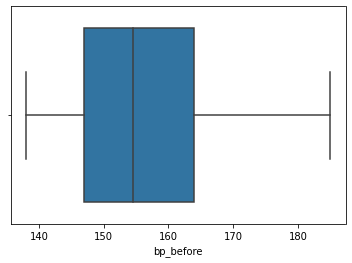

In [ ]:
#check if we have outliers
import seaborn as sns
sns.boxplot(x='bp_before',data=df,orient='v')


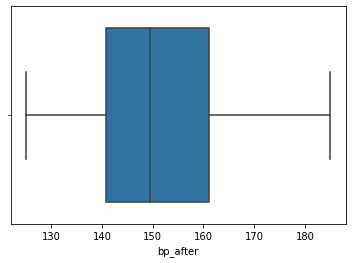

In [ ]:
sns.boxplot(x='bp_after',data=df,orient='h')


In [ ]:
'''
we then use  'ttest_rel' function of the scipy.stats package
'''
from scipy.stats import ttest_rel

In [ ]:
ttest_rel(df['bp_before'], df['bp_after'])


Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

# Results And Interpretation
The findings are statistically significant! One can reject the null hypothesis in support of the alternative.

#Explanation
A paired sample t-test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher (156.45 ± 11.39 units) compared to the blood pressure post intervention (151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


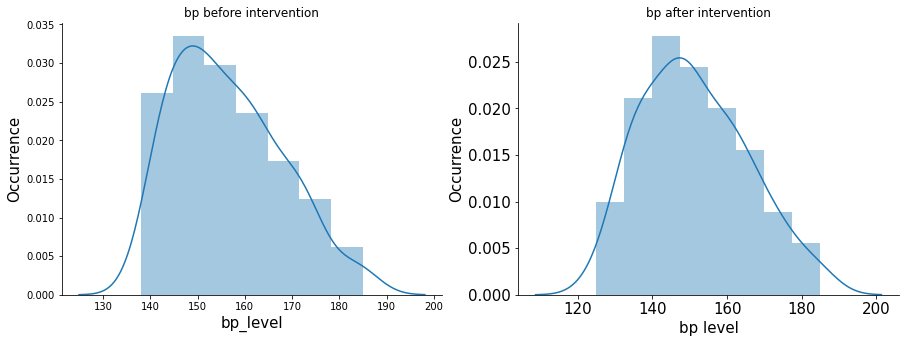

In [ ]:
'''Did we violate Assumption of normality ?
'''
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(df['bp_before'],ax=ax1)
ax1.set_xlabel('bp_level',fontsize=15)
ax1.set_ylabel('Occurrence',fontsize=15)
ax1.set_title("bp before intervention")
sns.despine(ax=ax1)
ax2.tick_params(labelsize=15)


sns.distplot(df['bp_after'],ax=ax2)
ax2.set_xlabel('bp level',fontsize=15)
ax2.set_ylabel('Occurrence',fontsize=15)
ax2.set_title("bp after intervention")
sns.despine(ax=ax2)
ax2.tick_params(labelsize=15)

#Test for Normality
There are two ways one can test for Normality
- make a histogram,Q-Q Plot and/or 
- use a statistical test(Shapiro-Wilk). Let’s do both.(we have plotted histo now lets use statistical test)

The histograms of our data does not seem to be normally distributed. There looks to be some skew. Let’s test this statistically to see if the data is normally distributed. To test this, one can use the **Shapiro-Wilk test for normality**. Unfortunately the output is not labeled. The first value is 
- The W test value, and the second value is 
- The p-value.

In [ ]:
from scipy.stats import shapiro
shapiro(df['bp_before'])

ShapiroResult(statistic=0.9547787308692932, pvalue=0.0004928423441015184)

In [ ]:
shapiro(df['bp_after'])

ShapiroResult(statistic=0.9740639328956604, pvalue=0.020227791741490364)

Both of the variables violate the assumption of normality by a large amount.Therefore our results may not be valid

 # Wilcoxon Sign-Ranked Test


This is the recommended test to use when the data violates the assumption of normality. It’s used to test if there is a significant difference on scores when there is a “before” and “after” condition of some treatment or intervention.


 

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Blood Pressure Before Q-Q Plot')

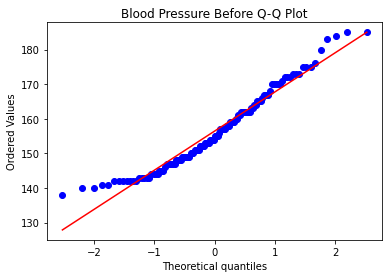

In [ ]:
from scipy.stats import probplot
probplot(df['bp_before'], dist="norm", plot=plt)
plt.title("Blood Pressure Before Q-Q Plot")


Text(0.5, 1.0, 'Blood Pressure Before Q-Q Plot')

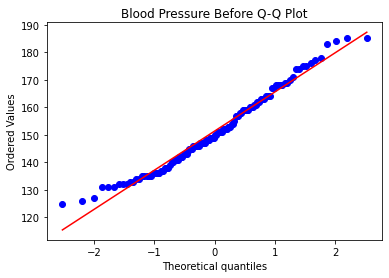

In [ ]:
from scipy.stats import probplot
probplot(df['bp_after'], dist="norm", plot=plt)
plt.title("Blood Pressure Before Q-Q Plot")


For both of the variables there appears to be some violations from normality particularly at the start and end of the data.(we confirmed this using shapiro wilk)

In [ ]:
'''
we can now use wilcoxon to analyse our data
'''
from scipy.stats import wilcoxon
wilcoxon(df['bp_before'], df['bp_after'])


WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

In [ ]:
'''
The findings are statistically significant!
 We can reject the null hypothesis in support of the alternative.
'''

'\nThe findings are statistically significant!\n We can reject the null hypothesis in support of the alternative.\n'

# CORRELATION


It is a statistical test of association between variables and is measured on a -1 to 1 scale. The closer the correlation value is to -1 or 1 the stronger the association, the closer to 0, the weaker the association. 



common types of tests to measure the level of correlation, 
- 1.Pearson
- 2.Spearman
- 3.and Kendall

In [ ]:
housing_df=pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
housing_df.corr().head().T

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000
population,0.111572,-0.117318,-0.299888,0.838867,0.856387
households,0.051062,-0.068296,-0.305171,0.914116,0.970758
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279


In [ ]:
!pip install ppscore

     |████████████████████████████████| 47 kB 3.3 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13068 sha256=0384e98a447e098760d9f210b55a3b8153857d713783b956db8933b2f842918e
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore


In [ ]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [ ]:
import ppscore as pps

In [ ]:
pps.matrix(housing_df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,longitude,longitude,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,longitude,latitude,0.770522,regression,True,mean absolute error,1.853283,0.425288,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,longitude,housing_median_age,0.069364,regression,True,mean absolute error,10.518000,9.788424,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,longitude,total_rooms,0.000000,regression,True,mean absolute error,1270.269333,1488.032478,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,longitude,total_bedrooms,0.000000,regression,True,mean absolute error,252.107333,296.872408,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
5,longitude,population,0.000000,regression,True,mean absolute error,662.914000,772.376280,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,longitude,households,0.000000,regression,True,mean absolute error,228.860000,269.033153,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,longitude,median_income,0.000000,regression,True,mean absolute error,1.338169,1.370494,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,longitude,median_house_value,0.062415,regression,True,mean absolute error,86595.475000,81190.638647,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
9,latitude,longitude,0.764556,regression,True,mean absolute error,1.750307,0.412100,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
